# Linear Regression

## Intuition

Linear Regression models the relationship between input features **X**
and a continuous target **y** using a linear function:

$$
\hat{y} = W^T X + b
$$

The goal is to find parameters **W** and **b** such that the predicted values
($\hat{y}$) are as close as possible to the true targets (y).

This is achieved by minimizing a cost function that measures
the prediction error over the training data.

## Mathematical Formulation 

Model (a function that tries to model the relationship between X and y):

$$
\hat{y} = W^T X + b
$$

Cost Function (Mean Squared Error (MSE)):

$$
J(W, b) = (1 / n)\Sigma((\hat{y} - y)^2)
$$

In [2]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Data Generation 
n_samples = 100
n_features = 1
noise = 15
random_state = 42

X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        noise=noise,
        random_state=random_state
       )

In [4]:
# Check X and y values 
print(X[:5])
print(y[:5])

[[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]]
[ 56.73356571 -16.91462544 -30.30257886   9.23159976 -16.60693589]


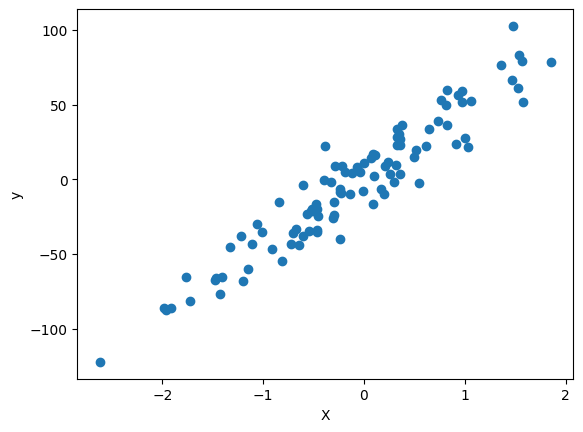

In [5]:
# visualize data
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
# Initialie Train and Test data
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=random_state)

### Linear Regression From Scratch
First we want to Build the model without using any ML library 

In [7]:
class LinearRegressionModel: 
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations  = n_iterations
        self.W = None 
        self.b = None 
        
    def fit(self, X, y): 
        n_samples, n_features = X.shape 
        self.W = np.zeros(n_features)
        self.b = 0.0
        
        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.W) + self.b 
            
            dW = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            
    def predict(self, X):
        y_hat = np.dot(X, self.W) + self.b
        return y_hat
            

In [8]:
# Fit the Model 
model_scratch = LinearRegressionModel(learning_rate=0.01, n_iterations=1000)
model_scratch.fit(X_train, y_train)

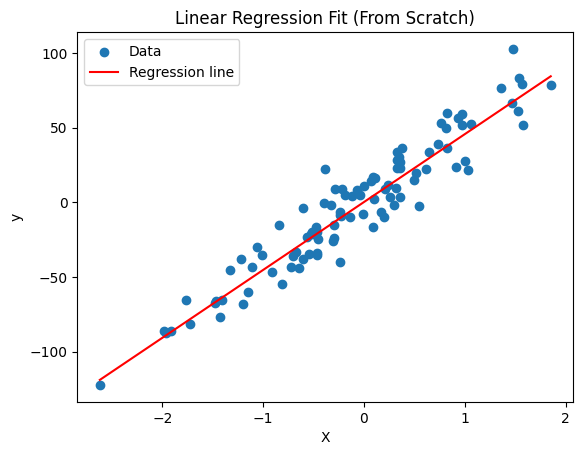

In [9]:
# Visualize Model (we know that we have just one feature)
a = model_scratch.W[0]
b = model_scratch.b 

pred_line_x = np.linspace(X.min(), X.max(), 100)
pred_line_y = a * pred_line_x + b

plt.scatter(X, y, label="Data")
plt.plot(pred_line_x, pred_line_y, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit (From Scratch)")
plt.show()

In [10]:
# Predict Test Data 
y_pred_scratch = model_scratch.predict(X_test)

# Evaluate Prediction 
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch  = r2_score(y_test, y_pred_scratch)

print("MSE:", mse_scratch)
print("R2 Score:", r2_scratch)

MSE: 234.60127968655746
R2 Score: 0.8741213346332742


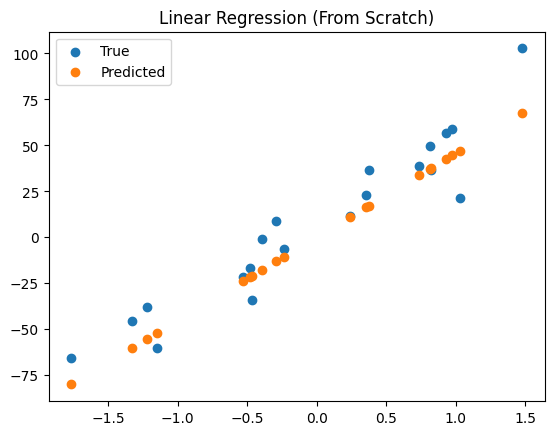

In [11]:
# Visualize Prediction
plt.scatter(X_test, y_test, label="True")
plt.scatter(X_test, y_pred_scratch, label="Predicted")
plt.legend()
plt.title("Linear Regression (From Scratch)")
plt.show()

### Linear Regression with scikit-learn
Now we just fit the scikit-learn linear regression model on our train data

In [12]:
# Fit
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

# Predict 
y_pred_sk = model_sk.predict(X_test)

# Evaluate 
mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk  = r2_score(y_test, y_pred_sk)

print("MSE:", mse_sk)
print("R2 Score:", r2_sk)

MSE: 234.45500969670806
R2 Score: 0.8741998178842183


In [107]:
print("From scratch -> MSE:", mse_scratch, "R2:", r2_scratch)
print("Scikit-learn -> MSE:", mse_sk, "R2:", r2_sk)

From scratch -> MSE: 234.60127968655746 R2: 0.8741213346332742
Scikit-learn -> MSE: 234.45500969670806 R2: 0.8741998178842183
